# Big Mart Sales Prediction

Importing the important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as R2
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics

Loading the dataset from csv file to a Pandas Dataframe

In [2]:
tr_df = pd.read_csv('train.csv')
te_df = pd.read_csv('bm_Test.csv')

First look at the data

In [3]:
# first five rows of the training dataset
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# first look at the test dataset
te_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of each data set

In [5]:
# number of data points & number of features
tr_df.shape

(8523, 12)

In [6]:
te_df.shape

(5681, 11)

Univariate Measures

In [7]:
#summary statistics train
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Check for Null values

In [8]:
## information about the dataset
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


##Categorical Features
- Item_Identifier 
- Item_Fat_Content 
- Item_Type 
- Outlet_Identifier 
- Outlet_Size  
- Outlet_Location_Type
- Outlet_Type  

Missing Values

In [10]:
## Checking for missing value 
tr_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
te_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
# mean value of Item_weight column
tr_df['Item_Weight'].mean()

12.857645184135976

In [13]:
## Filling the missing value in 'Item_Weight' column
tr_df['Item_Weight'].fillna(tr_df['Item_Weight'].mean(),inplace=True)


In [14]:
tr_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# mean value of Item_weight column
te_df['Item_Weight'].mean()

12.695633368756642

In [16]:
## Filling the missing value in 'Item_Weight' column
te_df['Item_Weight'].fillna(te_df['Item_Weight'].mean(),inplace=True)

In [17]:
te_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
##Replacing the missing value in 'Outlet_size' with mode
mode_of_outlet_size = tr_df.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None
)['Outlet_Size']

# Print the resulting mode_of_outlet_size
print(mode_of_outlet_size)


Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [19]:
missing_values = tr_df['Outlet_Size'].isnull()

In [20]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [21]:
# Replace missing values in 'Outlet_Size' based on the mode from 'Outlet_Type'
tr_df.loc[missing_values, 'Outlet_Size'] = tr_df.loc[missing_values, 'Outlet_Type'].apply(
    lambda x: mode_of_outlet_size.get(x, None)
)


In [22]:
## Checking for the missing values
tr_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
# Unique Outlet_Type values in big_mart_data
print(tr_df['Outlet_Type'].unique())

# Keys in mode_of_outlet_size
print(mode_of_outlet_size.index if isinstance(mode_of_outlet_size, pd.Series) else mode_of_outlet_size.keys())


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')


In [24]:
# Handle missing keys with a default value (e.g., "Unknown" or most common size)
default_size = tr_df['Outlet_Size'].mode()[0]  # Most common size across all
tr_df['Outlet_Size'].fillna(default_size, inplace=True)


In [25]:
# Check rows where Outlet_Size is NaN
missing_values =tr_df['Outlet_Size'].isna()
print(tr_df.loc[missing_values])


Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales]
Index: []


Test_data

In [26]:
#Replacing the missing value in 'Outlet_size' with mode
mode_of_outlet_size = te_df.pivot_table(
    values='Outlet_Size',
    index='Outlet_Type',
    aggfunc=lambda x: x.mode()[0] if not x.mode().empty else None
)['Outlet_Size']

# Print the resulting mode_of_outlet_size
print(mode_of_outlet_size)


Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [27]:
missing_values = te_df['Outlet_Size'].isnull()
missing_values

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [28]:
# Replace missing values in 'Outlet_Size' based on the mode from 'Outlet_Type'
te_df.loc[missing_values, 'Outlet_Size'] = te_df.loc[missing_values, 'Outlet_Type'].apply(
    lambda x: mode_of_outlet_size.get(x, None)
)

In [29]:
# Unique Outlet_Type values in big_mart_data
print(te_df['Outlet_Type'].unique())

# Keys in mode_of_outlet_size
print(mode_of_outlet_size.index if isinstance(mode_of_outlet_size, pd.Series) else mode_of_outlet_size.keys())

['Supermarket Type1' 'Grocery Store' 'Supermarket Type3'
 'Supermarket Type2']
Index(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'],
      dtype='object', name='Outlet_Type')


In [30]:
## Checking for the missing values
te_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [31]:
# Handle missing keys with a default value (e.g., "Unknown" or most common size)
default_size = te_df['Outlet_Size'].mode()[0]  # Most common size across all
te_df['Outlet_Size'].fillna(default_size, inplace=True)


In [32]:
# Check rows where Outlet_Size is NaN
missing_values =te_df['Outlet_Size'].isna()
print(te_df.loc[missing_values])

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type]
Index: []


In [33]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
te_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Feature Engineering

In [35]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  tr_df[num]
#categoric df
BM_cat = tr_df[cat]

#print(num)
#print(cat)

[tr_df[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Small     4798
 Medium    2793
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

Repeating values with different names in the Item_Fat_Content column

In [36]:
#train
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
tr_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [38]:
#creating our new column for both datasets
tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
#tr_df['Outlet_Age'].head
#te_df['Outlet_Age'].head

Data Visualization

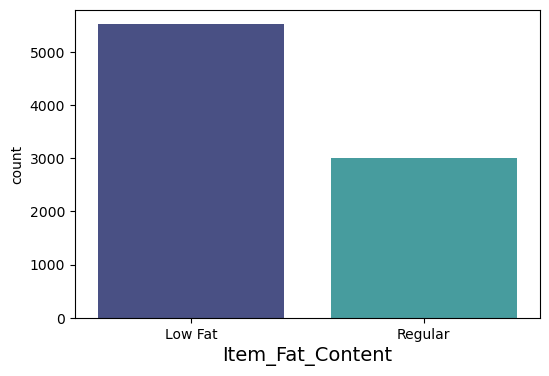

In [39]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=tr_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

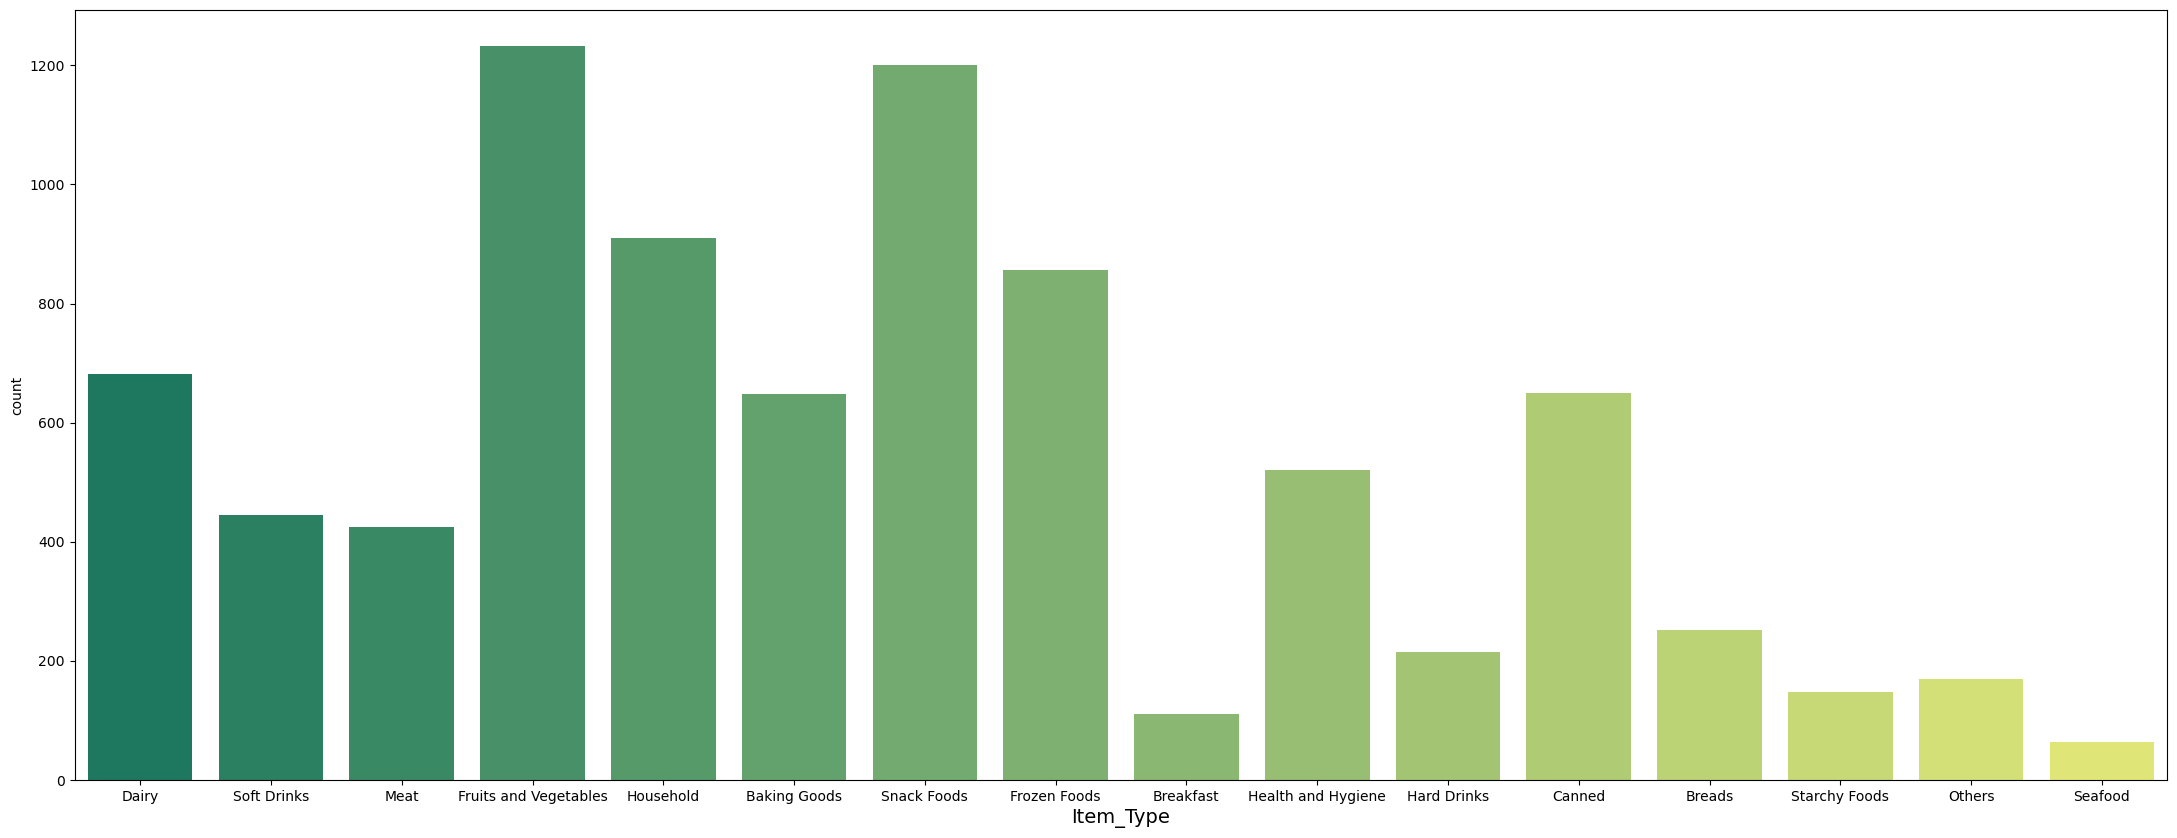

In [40]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=tr_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

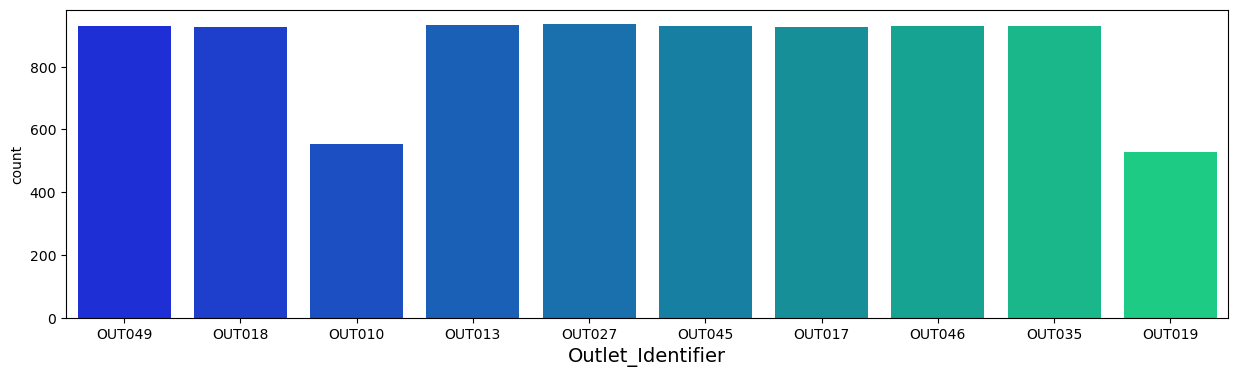

In [41]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=tr_df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

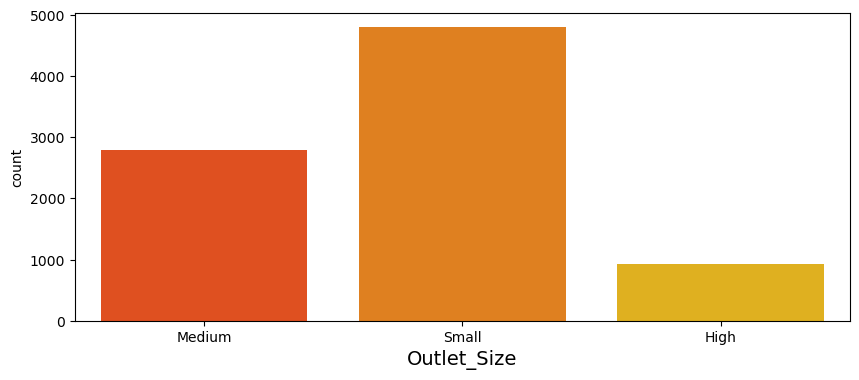

In [42]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=tr_df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

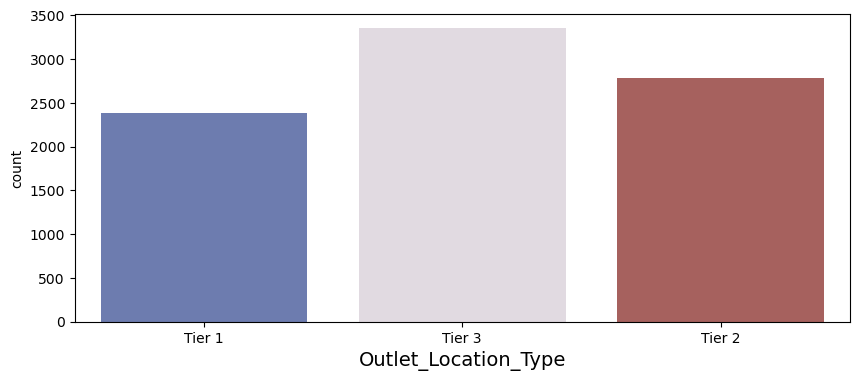

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=tr_df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

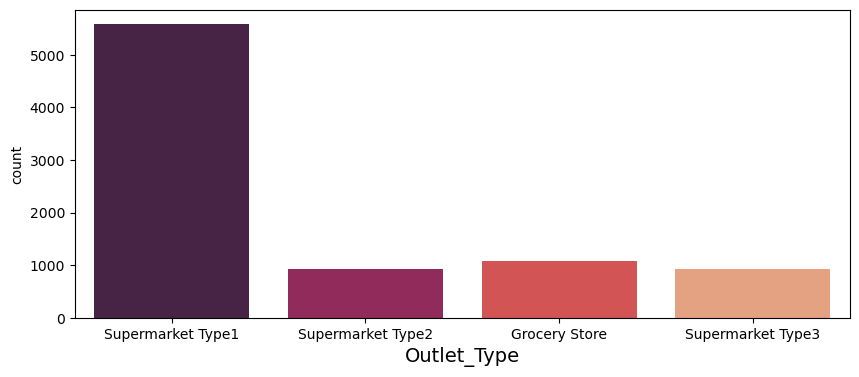

In [44]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

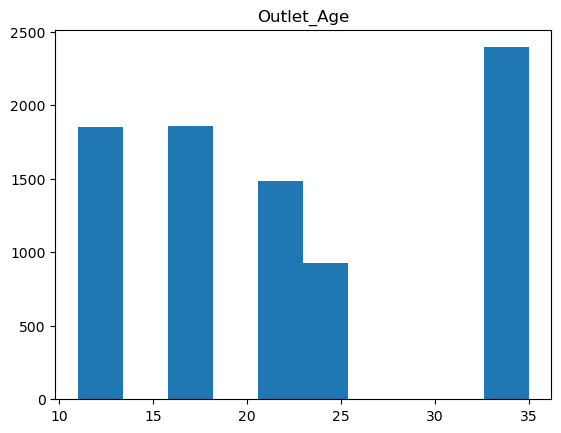

In [45]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  tr_df[num]

plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

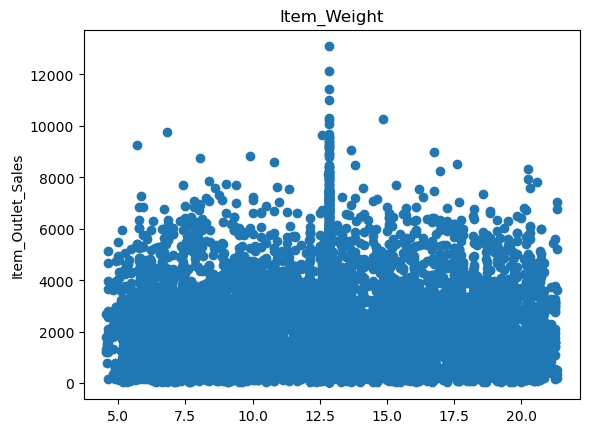

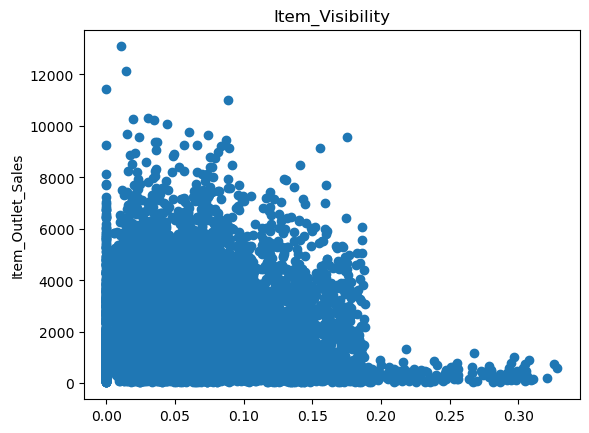

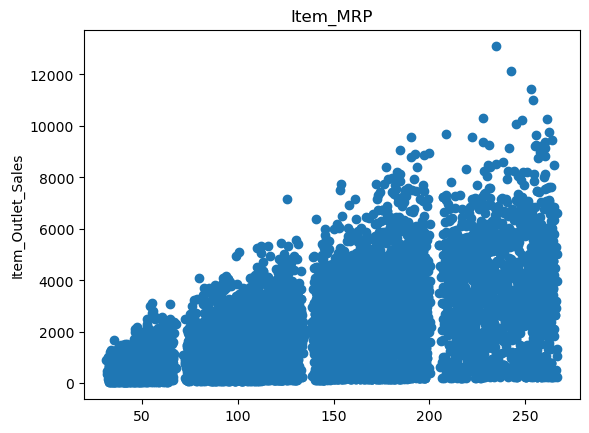

In [46]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

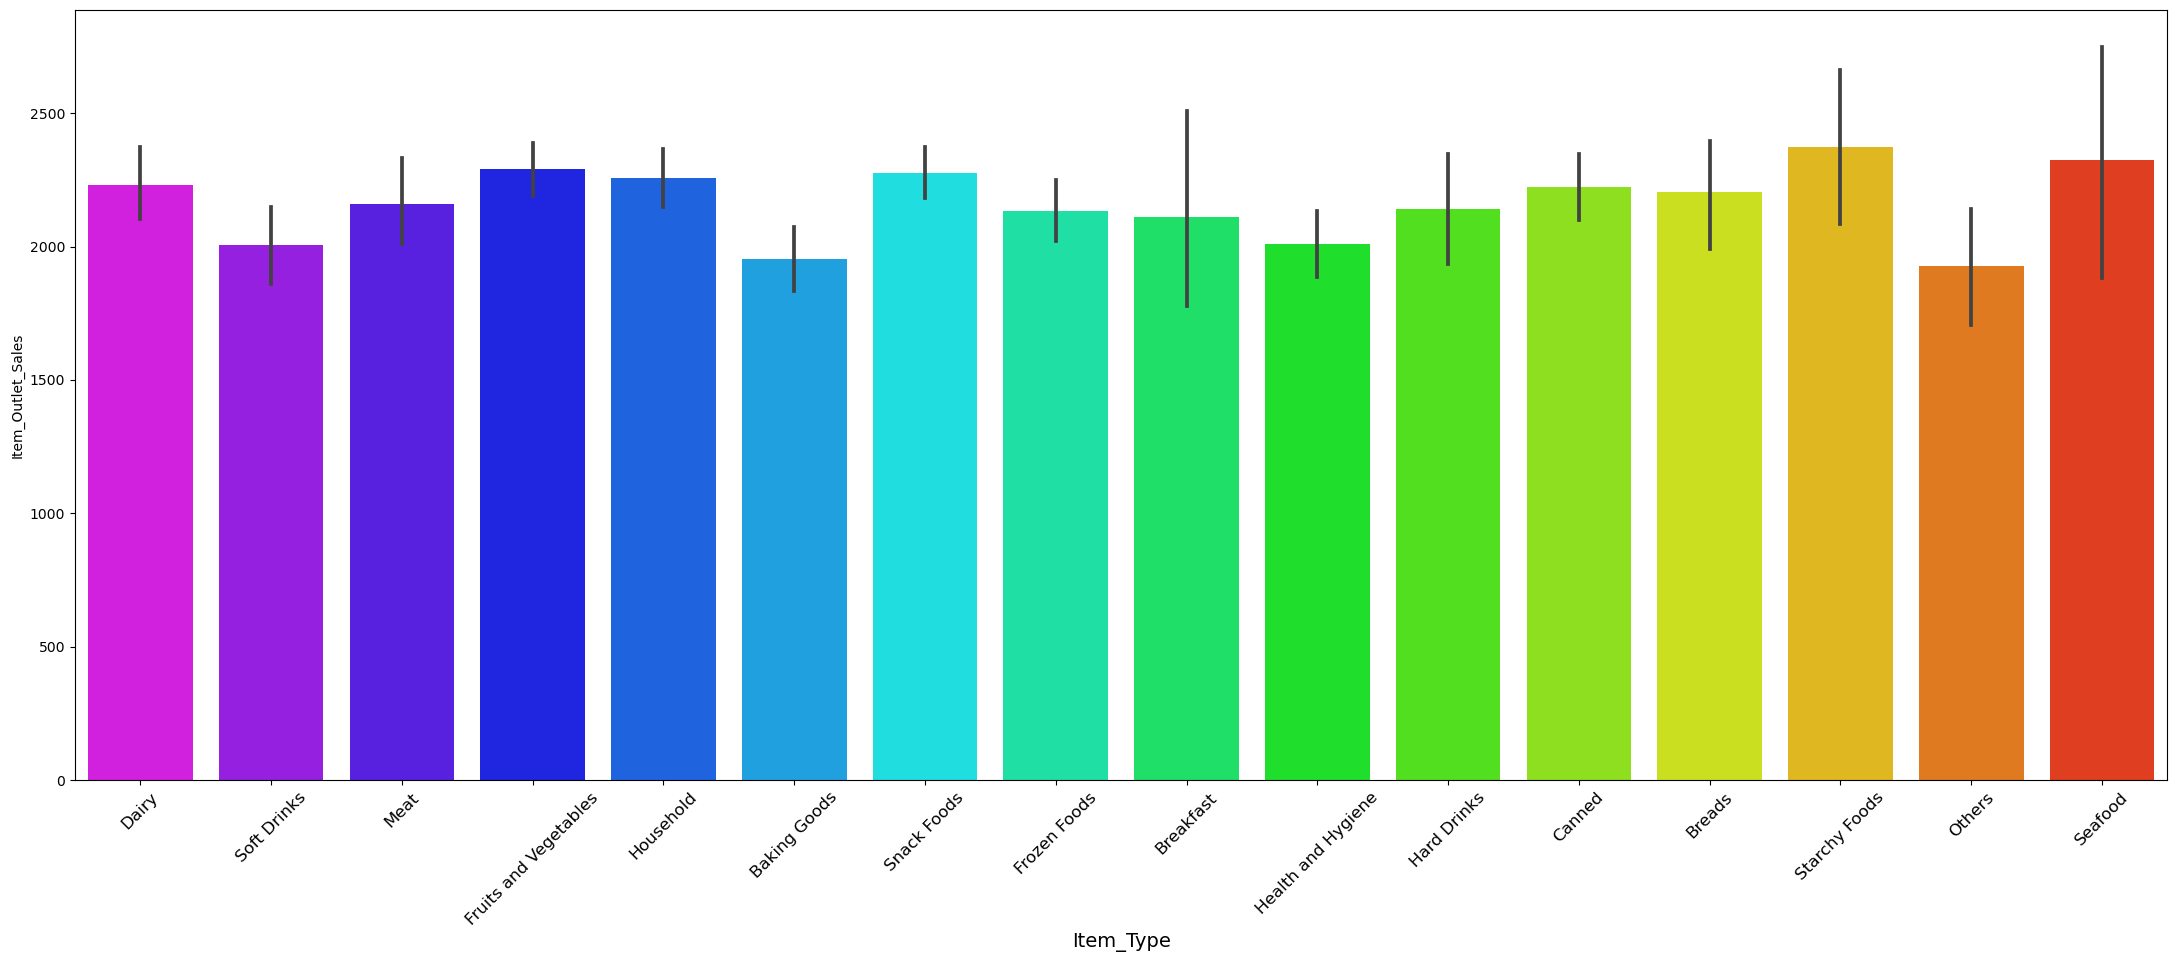

In [47]:
plt.figure(figsize=(27, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=tr_df, palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)

# Legend is not necessary for barplot unless you add hue, so it can be removed.
# plt.legend()

plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.show()


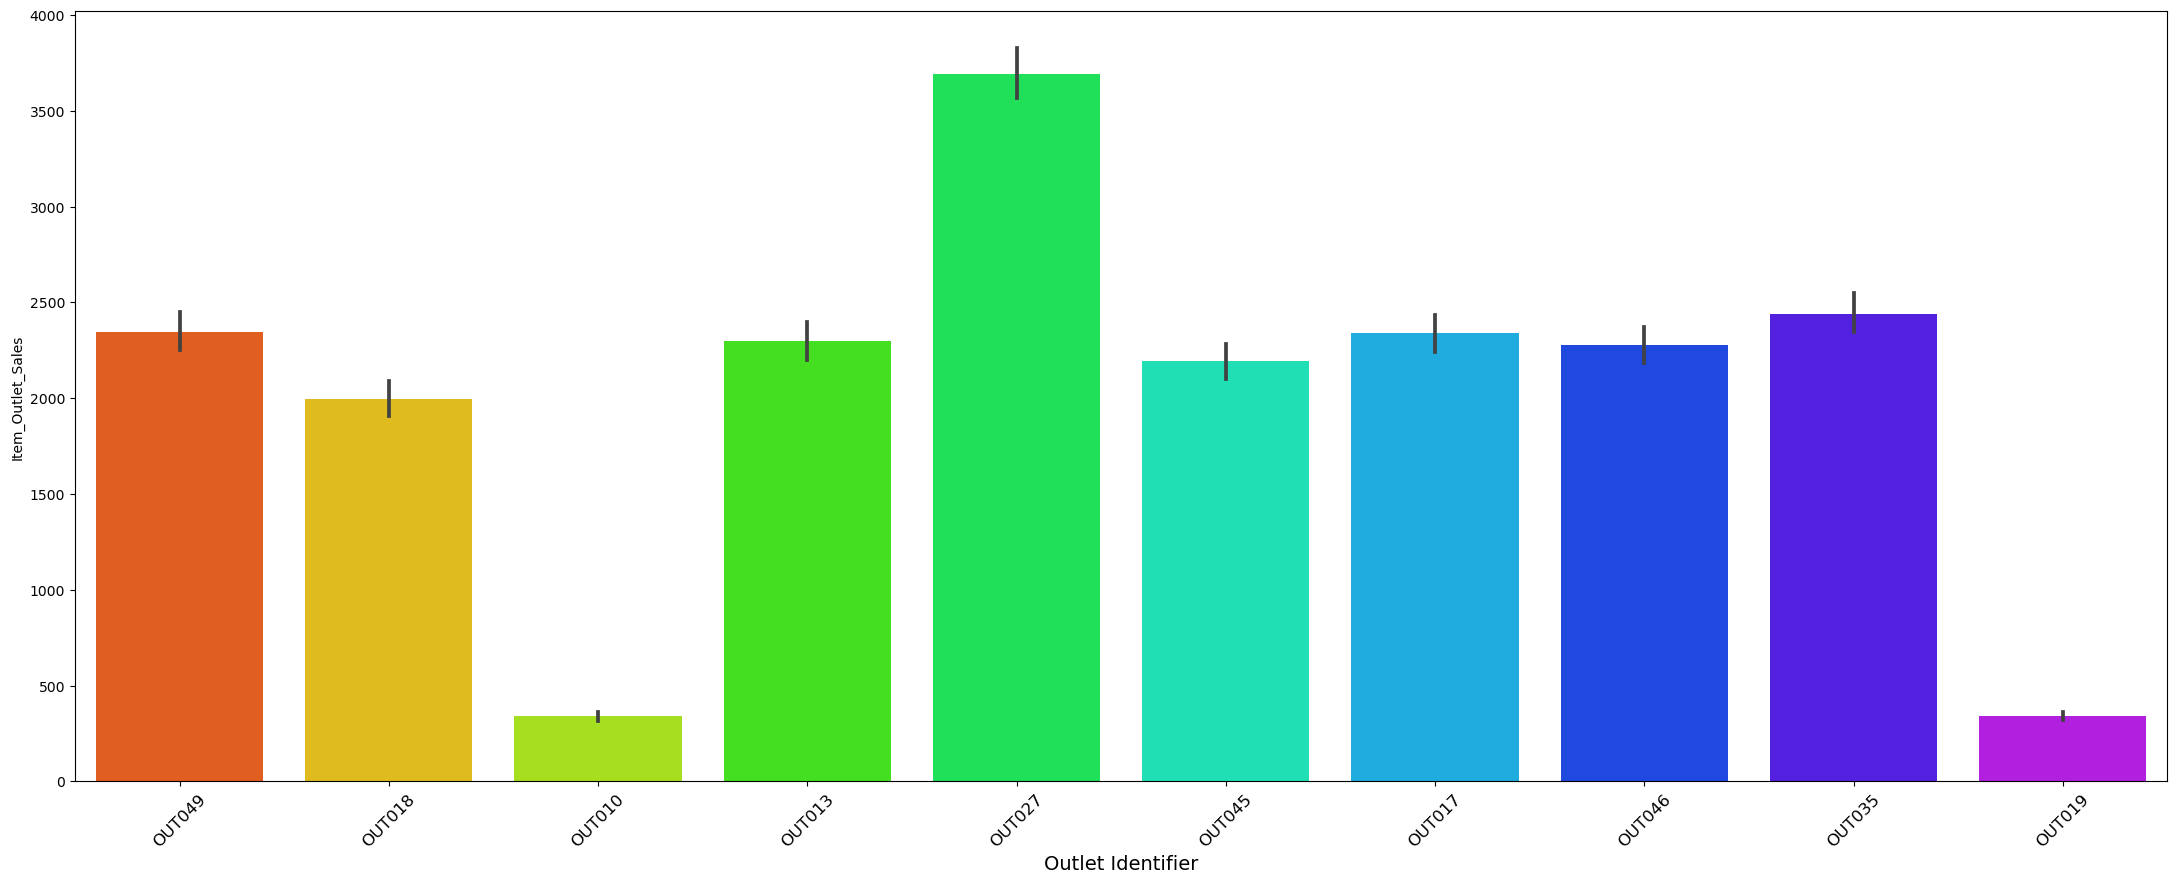

In [48]:
plt.figure(figsize=(27, 10))

# Use explicit keyword arguments for clarity
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=tr_df, palette='gist_rainbow')

# Set x-axis label
plt.xlabel('Outlet Identifier', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Remove legend call, as it is unnecessary here
plt.show()


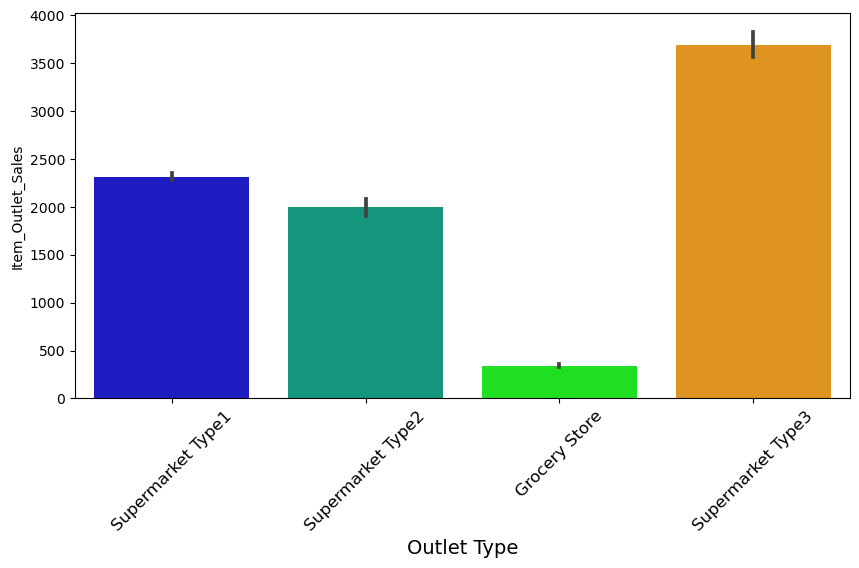

In [49]:
plt.figure(figsize=(10, 5))

# Use explicit keywords for clarity
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=tr_df, palette='nipy_spectral')

# Label the x-axis
plt.xlabel('Outlet Type', fontsize=14)

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45, fontsize=12)

# Remove legend call as it's not required here
plt.show()


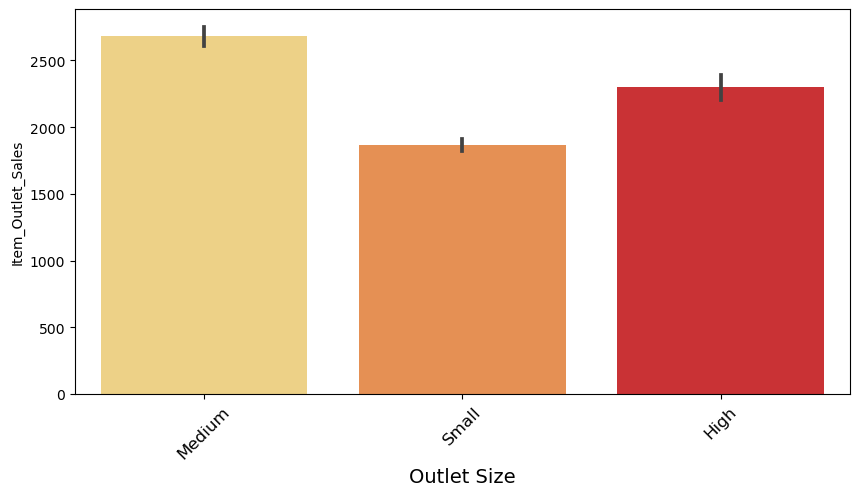

In [50]:
plt.figure(figsize=(10, 5))

# Explicitly define x and y to avoid confusion
sns.barplot(x='Outlet_Size', y='Item_Outlet_Sales', data=tr_df, palette='YlOrRd')

# Set x-axis label
plt.xlabel('Outlet Size', fontsize=14)

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45, fontsize=12)

# Remove unnecessary legend
plt.show()


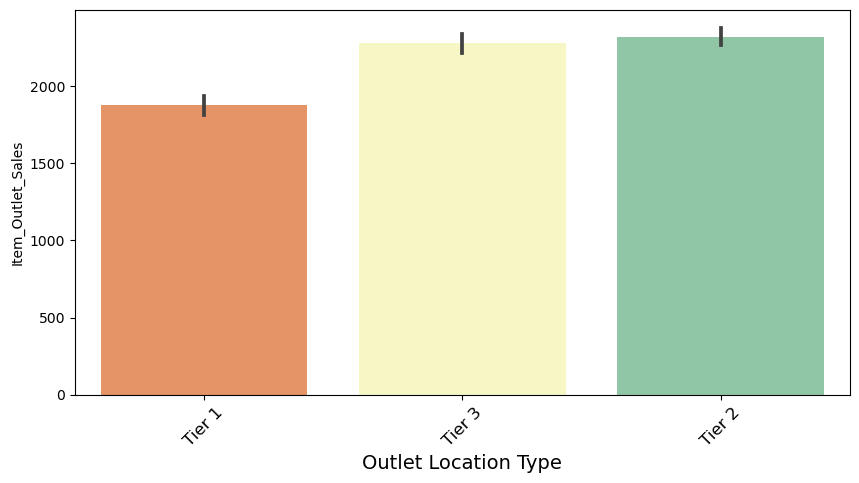

In [51]:
plt.figure(figsize=(10, 5))

# Explicitly define x, y, and data parameters for clarity
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=tr_df, palette='Spectral')

# Set the x-axis label
plt.xlabel('Outlet Location Type', fontsize=14)

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45, fontsize=12)

# Remove the unnecessary legend call
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_14820\1549688946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr_df.corr() ,cmap='rocket')


<Axes: >

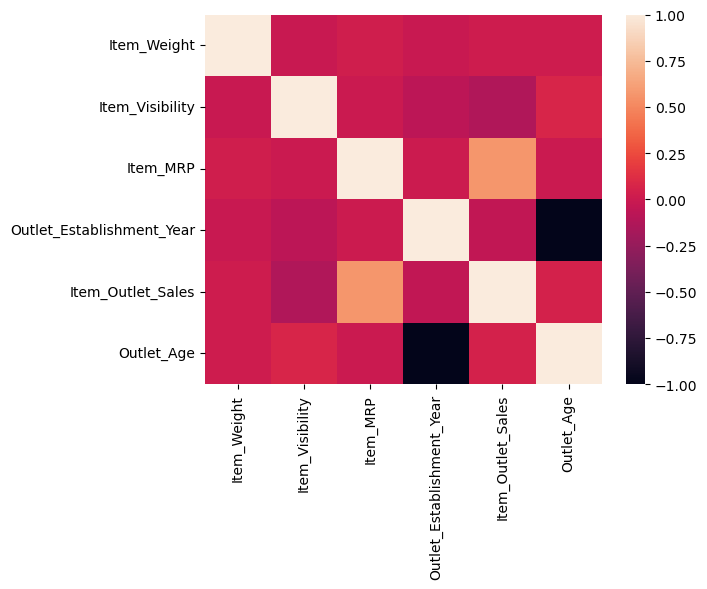

In [52]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='rocket')

We can see Item_Outlet_Sales is highly correlated with Item_MRP

Feature Engineering
Categorical values:

We have 7 columns we need to delete or encode.

Ordinal variables:

Item_Fat_Content
Outlet_Size
Outlet_Location_Type
Nominal variables:

Item_Identifier
Item_Type
Outlet_Identifier
Outlet_Type

Checking the number of unique values in each column

In [53]:
BM_cat.apply(lambda x: x.nunique()) 

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

lable encoding

In [54]:
le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    tr_df[i] = le.fit_transform(tr_df[i])
    te_df[i] = le.fit_transform(te_df[i])
    
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


One hot encoding

In [55]:
# Select columns to encode
cols = ['Item_Type', 'Outlet_Type']

# Initialize OneHotEncoder (fit on train data only)
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit on the training set and transform both train and test sets
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.transform(te_df[cols])).astype('int64')

# Get feature names from the encoder using the updated method
tr_oh.columns = OH_encoder.get_feature_names_out(cols)
te_oh.columns = OH_encoder.get_feature_names_out(cols)

# Restore the original indices
tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Concatenate the one-hot encoded columns with the original datasets
tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)

C:\Users\dell\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Dropping irrelevant columns

In [56]:
tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [57]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,2,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


Machine learning models

In [58]:
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
y = tr_fe['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [59]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

Linear Regression

In [60]:

# Step 1: Standardize the features (since normalize=True is deprecated)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Create the Linear Regression model
LR = LinearRegression()

# Step 3: Fit the model
LR.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_predict = LR.predict(X_test_scaled)

# Step 5: Calculate performance metrics
LR_MAE = round(MAE(y_test, y_predict), 2)
LR_MSE = round(MSE(y_test, y_predict), 2)
LR_R_2 = round(R2(y_test, y_predict), 4)
LR_CS = round(cross_val_score(LR, X, y, cv=5).mean(), 4)

# Step 6: Print the results
print(f"Mean Absolute Error: {LR_MAE}")
print(f"Mean Squared Error: {LR_MSE}")
print(f"R² Score: {LR_R_2}")
print(f"Cross-Validation Score (5-fold): {LR_CS}")


Mean Absolute Error: 838.79
Mean Squared Error: 1286260.51
R² Score: 0.5591
Cross-Validation Score (5-fold): 0.5582


In [61]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv") 

Random Forest

In [62]:
# Step 1: Optionally standardize data (not needed for RandomForest but for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the Random Forest Regressor model
RFR = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4, random_state=101)

# Step 3: Fit the model
RFR.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_predict = RFR.predict(X_test_scaled)

# Step 5: Calculate performance metrics
RFR_MAE = round(MAE(y_test, y_predict), 2)
RFR_MSE = round(MSE(y_test, y_predict), 2)
RFR_R_2 = round(R2(y_test, y_predict), 4)
RFR_CS = round(cross_val_score(RFR, X, y, cv=5).mean(), 4)

# Step 6: Print the results
print(f"Mean Absolute Error: {RFR_MAE}")
print(f"Mean Squared Error: {RFR_MSE}")
print(f"R² Score: {RFR_R_2}")
print(f"Cross-Validation Score (5-fold): {RFR_CS}")


Mean Absolute Error: 1001.31
Mean Squared Error: 1803524.67
R² Score: 0.3818
Cross-Validation Score (5-fold): 0.592


In [63]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv") 

Lasso Regression

In [64]:
# Step 1: Optionally standardize data (since Lasso is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Initialize the Lasso regression model
LS = Lasso(alpha=0.05)

# Step 3: Fit the model
LS.fit(X_train_scaled, y_train)

# Step 4: Make predictions
y_predict = LS.predict(X_test_scaled)

# Step 5: Calculate performance metrics
LS_MAE = round(MAE(y_test, y_predict), 2)
LS_MSE = round(MSE(y_test, y_predict), 2)
LS_R_2 = round(R2(y_test, y_predict), 4)
LS_CS = round(cross_val_score(LS, X, y, cv=5).mean(), 4)

# Step 6: Print the results
print(f"Mean Absolute Error: {LS_MAE}")
print(f"Mean Squared Error: {LS_MSE}")
print(f"R² Score: {LS_R_2}")
print(f"Cross-Validation Score (5-fold): {LS_CS}")


Mean Absolute Error: 838.75
Mean Squared Error: 1286202.46
R² Score: 0.5591
Cross-Validation Score (5-fold): 0.5583


In [65]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv("Lasso Regressor.csv")  

In [66]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
2,Lasso Regressor,838.75,1286202.46,0.5591,0.5583
0,Linear Regression,838.79,1286260.51,0.5591,0.5582
1,Random Forest Regressor,1001.31,1803524.67,0.3818,0.5920


Realizations
Item_MRP optimizes Maximum Outlet sales (positive correlation with the target).
Linear Regression and Lasso Regressor have the best perfomance in most categories.
only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
For better peformance this models need tuning e.g. Grid Search.